Libraries

In [79]:
# Importing all of the necessary packages to read and display data and spatial data
import pandas as pd
import geopandas as gpd

Data

In [80]:
# Reading in the Former Municipality Boundaries Data file and reprojecting (geometry will be in metres)
fmbd_old = gpd.read_file('data/Former Municipality Boundaries Data.geojson')
fmbd = fmbd_old.to_crs("EPSG:26917")
# Reading in the Community Shelters file and reprojecting (geometry will be in metres)
shelters_old = gpd.read_file("data/shelters.geojson")
shelters = shelters_old.to_crs("EPSG:26917")
# Reading in the Waste Transfer Station file and reprojecting (geometry will be in metres)
waste_old = gpd.read_file("data/waste.geojson")
waste = waste_old.to_crs("EPSG:26917")
# Reading in the City Wards Data file and reprojecting (geometry will be in metres)
cwd_old = gpd.read_file("data/City Wards Data.geojson")
cwd = cwd_old.to_crs("EPSG:26917")

Functions

In [81]:
# buffer_sjoin function
# Create buffers around shelters file
shelter_buffers = shelters.copy()
shelter_buffers['geometry'] = shelters.buffer(400)
# Perform spatial join with Former Municipalities Boundary Data file
shelters_w_fmbd = shelter_buffers.sjoin(fmbd, how = "inner", predicate = "within")

In [82]:
# sjoin_count function
# Join shelters file into the waste file
waste_with_shelters = waste.sjoin_nearest(shelters)
# Count how many columns are from the shelters file
shelters_c = waste_with_shelters.filter(shelters.columns).shape[1]
# Displays the count of the columns from the shelters file
shelters_c

18

Functions Demo

In [83]:
# Display non-spatial data table results of the buffer_sjoin function
shelters_w_fmbd.head()

,ADDRESS_PO,ADDRESS_FU,POSTAL_COD,MUNICIPALI,CITY,CENTRELINE,OBJECTID_left,WARD,NEIGHBOURH,NEIGHBOU_1,...,_id,AREA_ID,DATE_EFFECTIVE,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID_right
0,808260,70 Gerrard St E,M5B1G6,former TORONTO,Toronto,1143800,44,Toronto Centre-Rosedale (27),75,Church-Yonge Corridor,...,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041
1,9531684,3410 Bayview Ave,M2M3S3,NORTH YORK,Toronto,9531674,45,Willowdale (24),50,Newtonbrook East,...,2,643704.0,,643704.0,49886.0,08,08,NORTH YORK,NORTH YORK,11678465
2,2591634,87 Pembroke St,M5A2N9,former TORONTO,Toronto,14020526,46,Toronto Centre-Rosedale (27),73,Moss Park,...,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041
3,8067796,129 Peter St,M5V2H3,former TORONTO,Toronto,20139637,47,Trinity-Spadina (20),77,Waterfront Communities-The Islands,...,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041
4,6362877,191 Spadina Rd,M5R2T9,former TORONTO,Toronto,6362837,48,Trinity-Spadina (20),95,Annex,...,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041


<Axes: >

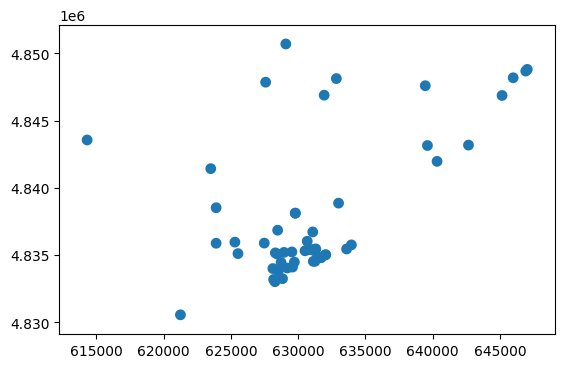

In [84]:
# Plot spatial data results of the buffer_sjoin function
shelters_w_fmbd.plot()

In [85]:
# Display non-spatial data table results of the sjoin_count function
waste_with_shelters.filter(shelters.columns)

,ADDRESS_PO,ADDRESS_FU,POSTAL_COD,MUNICIPALI,CITY,CENTRELINE,OBJECTID,NEIGHBOURH,NEIGHBOU_1,COMMUNITY_,CONFIDENTI,MOTEL,CAPACITY,NAME,TYPE,TYPE2,CITY_OP,geometry
0,14601973,25 Canterbury Pl,M2N0E3,NORTH YORK,Toronto,438636,12,37,Willowdale West,NORTH YORK COMMUNITY COUNCIL,N,None,32,Eva's Place - Satellite,Single,Youth,None,POINT (623096.912 4846546.127)
1,8236601,2714 Danforth Ave,M4C1L7,former TORONTO,Toronto,14066698,8,62,East End-Danforth,TORONTO AND EAST YORK COMMUNITY COUNCIL,N,None,70,Dixon Hall - Heyworth House,Single,Mixed Adult,None,POINT (635455.808 4842375.472)
2,8133841,6 Warrendale Crt,M9V1P9,ETOBICOKE,Toronto,20142089,56,2,Mount Olive-Silverstone-Jamestown,ETOBICOKE YORK COMMUNITY COUNCIL,N,None,50,Youth Without Shelter,Single,Youth,None,POINT (612605.946 4839574.521)
3,7195894,422 Gilbert Ave,M6E4X3,YORK,Toronto,7195447,24,109,Caledonia-Fairbanks,ETOBICOKE YORK COMMUNITY COUNCIL,N,None,35,Horizons for Youth,Single,Youth,None,POINT (623176.843 4839762.608)
4,14198104,1651 Sheppard Ave E,M2J5H1,NORTH YORK,Toronto,438319,37,53,Henry Farm,NORTH YORK COMMUNITY COUNCIL,N,None,28,Seaton House/Downsview Dells,Single,Single Men,Y,POINT (633746.525 4851355.504)
5,13968838,1229 Ellesmere Rd,M1P4V8,SCARBOROUGH,Toronto,108327,2,127,Bendale,SCARBOROUGH COMMUNITY COUNCIL,N,None,160,Birkdale Residence,Family,Family,Y,POINT (641378.219 4850774.075)
6,855691,875 Queen St E,M4M1J2,former TORONTO,Toronto,1143652,54,70,South Riverdale,TORONTO AND EAST YORK COMMUNITY COUNCIL,N,None,120,Woodgreen Red Door Queen,Family,Family,None,POINT (633921.801 4834560.044)


<Axes: >

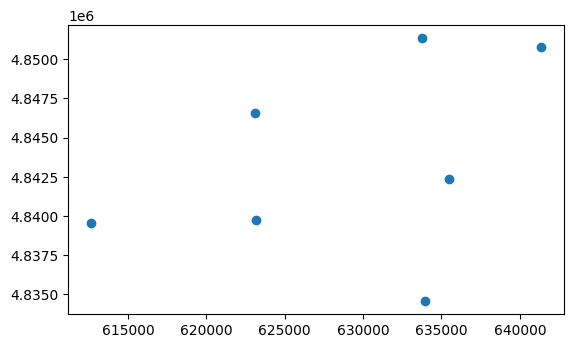

In [86]:
# Plot spatial data results of the sjoin_count function
waste_with_shelters.filter(shelters.columns).plot()

Data Structures

In [87]:
# Creating list with the Former Municipalities Boundary Data and City Wards Data geodataframes
gdf_list = [fmbd, cwd]
# Creating dictionary with the shelters and waste geodataframes
gdf_dict = {'Shelter locations': shelters, 'Waste Transfer Station': waste}

<Axes: >

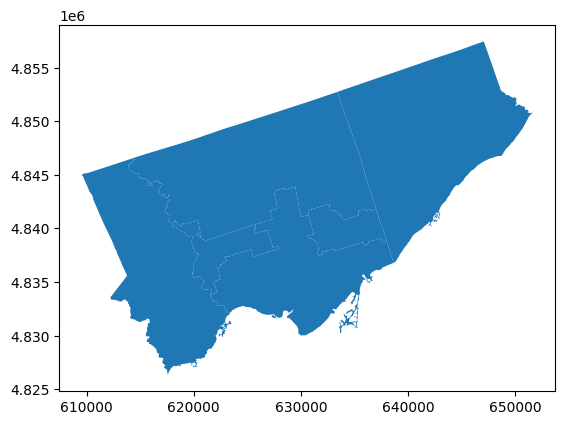

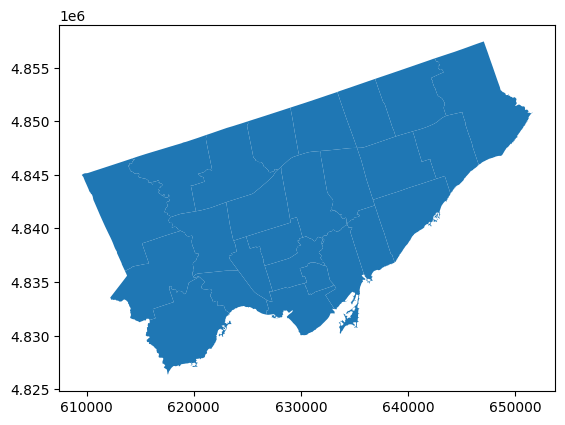

In [88]:
# Plotting the Former Municipalities Boundary Data geodataframe from list
FMBD = gdf_list[0]
FMBD.plot()
# Plotting the City Wards Data geodataframe from list
CWD = gdf_list[1]
CWD.plot()

<Axes: >

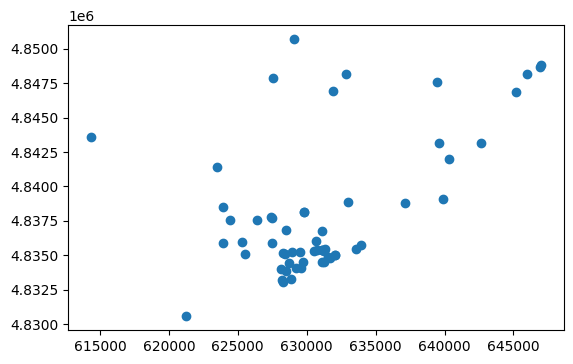

In [89]:
# Plotting the Shelters geodataframe from dictionary
Shelter_locations = gdf_dict['Shelter locations']
Shelter_locations.plot()

<Axes: >

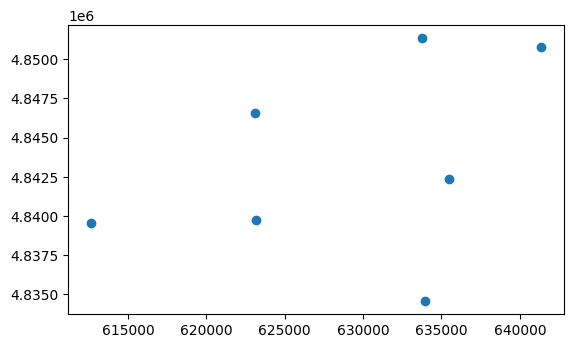

In [90]:
# Plotting the Waste geodataframe from dictionary
Waste_locations = gdf_dict['Waste Transfer Station']
Waste_locations.plot()

For Loops

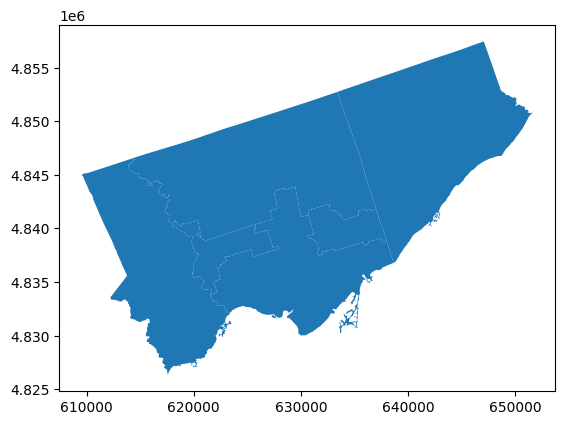

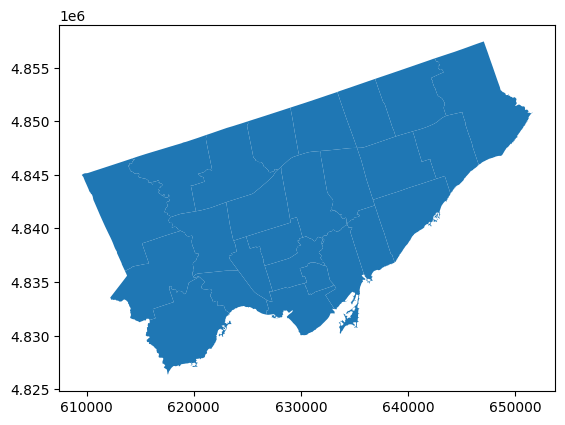

In [93]:
# Using a For Loop to plot every geodatafram in the gdf_list
for list in gdf_list:
    list.plot()

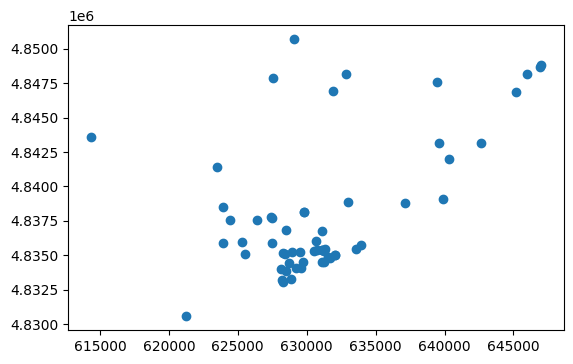

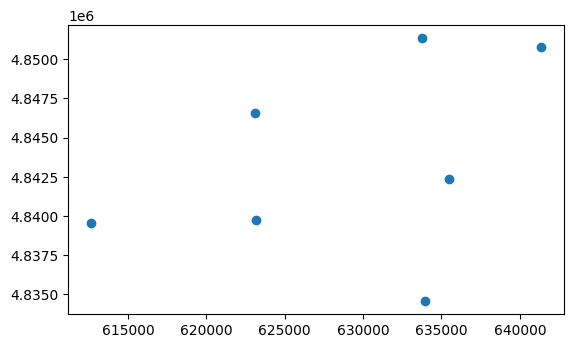

In [105]:
# Using a For Loop to plot every geodatafram in the gdf_dict
for dict in gdf_dict.values():
    dict.plot()